In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_stat.csv")

In [ ]:
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5




*   player : 선수이름
*   pos : 포지션


*   3p : 3점슛 성공 횟수

*   2p : 2점슛 성공 횟수
*   TRB : 리바운드 성공 횟수



*   AST : 평균 어이스트 성공 횟수
*   STL : 평균 스틸 성공 횟수


*   BLK : 평균 블로킹 성공 횟수





In [ ]:
# 포지션 갯수 확인
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'STL and 2P in 2d plane')

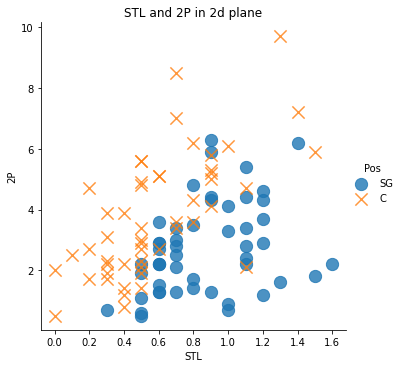

In [ ]:
#스틸, 2점슛 데이터 시각화
sns.lmplot('STL','2P',data = df,fit_reg = False,
           scatter_kws = {'s':150},
           markers = ['o','x'],
           hue = 'Pos')
plt.title('STL and 2P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'AST and 2P in 2d plane')

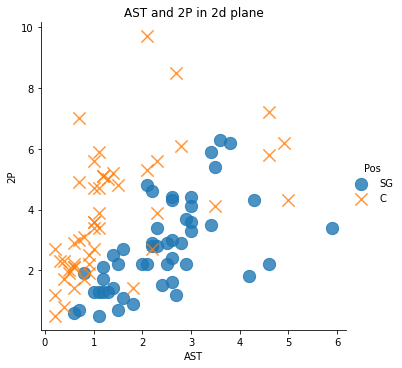

In [ ]:
#어시스트, 2점슛 데이터 시각화
sns.lmplot('AST','2P',data = df,fit_reg = False,
           scatter_kws = {'s':150},
           markers = ['o','x'],
           hue = 'Pos')
plt.title('AST and 2P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'BLK and 3P in 2d plane')

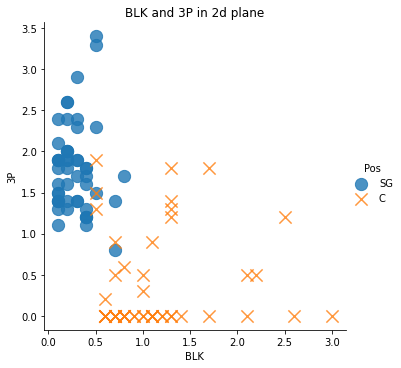

In [ ]:
#블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK','3P',data = df,fit_reg = False,
           scatter_kws = {'s':150},
           markers = ['o','x'],
           hue = 'Pos')
plt.title('BLK and 3P in 2d plane')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'TRB and 3P in 2d plane')

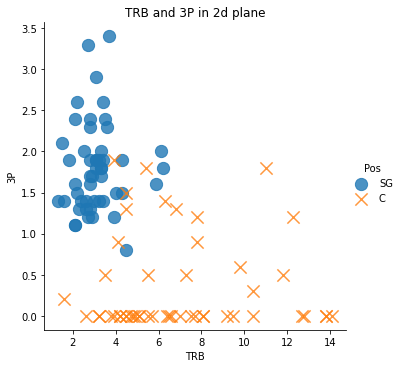

In [ ]:
#리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB','3P',data = df,fit_reg = False,
           scatter_kws = {'s':150},
           markers = ['o','x'],
           hue = 'Pos')
plt.title('TRB and 3P in 2d plane')

In [ ]:
# 분별력이 없는 특징 제거 : 2점슛, 어시스트, 스틸
df.drop(['2P','AST','STL'],axis = 1, inplace=True)

In [ ]:
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [ ]:
train.shape

(80, 5)

In [ ]:
test.shape

(20, 5)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# 최적의 K를 찾기 위해 교차 검증을 수행할 K의 범위를 지정: 학습 데이터의 절반까지 사용
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3,max_k_range,2):
  k_list.append(i)

In [ ]:
# 교차 검증 준비
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

In [ ]:
# 교차 검증( cv 파라미터 : 몇 홀드를 할 것인지)
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,x_train,y_train.values.ravel(),
                           cv = 10 , scoring='accuracy')
  cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.9125,
 0.925,
 0.9375,
 0.9375,
 0.925,
 0.925,
 0.925,
 0.9375,
 0.9375,
 0.925,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.8625,
 0.85,
 0.85,
 0.85,
 0.825]

Text(0, 0.5, 'accuracy')

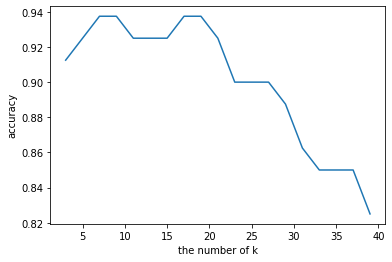

In [ ]:
# 결과 시각화
plt.plot(k_list,cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('accuracy')

In [ ]:
# 가장 예측율이 높은 k
k  = k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('최고는 '+str(k))

최고는 7


In [ ]:
knn = KNeighborsClassifier(n_neighbors = k)

In [ ]:
# 학습에 사용할 속성
x_train = train[['3P','BLK','TRB']]
y_train = train[['Pos']]

In [ ]:
knn.fit(x_train,y_train.values.ravel())

KNeighborsClassifier(n_neighbors=7)

In [ ]:
# 테스트 데이터
x_test = test[['3P','BLK','TRB']]
y_test = test[['Pos']]

In [ ]:
pred = knn.predict(x_test)

In [ ]:
#정확도
from sklearn.metrics import accuracy_score
print('accuracy: '+str(accuracy_score(y_test.values.ravel(),pred)))

accuracy: 0.85


In [ ]:
comparsion= pd.DataFrame(
    {'예측값':pred,
     '실제값':y_test.values.ravel()}
)

In [ ]:
comparsion

,예측값,실제값
0,SG,SG
1,SG,SG
2,C,C
3,C,SG
4,SG,SG
5,C,C
6,C,C
7,C,SG
8,C,C
9,C,C
